## 가설 검정 - 이변량 분석 (범주 vs 범주)

---

### 분석하기 위한 방법

- **교차표**로 집계하기
    - **`pd.crosstab(행, 열, normalize=)`**
        - normalize 옵션 : 비율로 전환
        - columns : 열 기준 100%
        - index : 행 기준 100%
        - all : 전체 기준 100%
    
    ```python
    pd.crosstab(데이터프레임['열이름'], 데이터프레임['열이름'])
    pd.crosstab(데이터프레임['열이름'], 데이터프레임['열이름'], normalize='')
    ```
    
- 시각화
    - mosaic plot : 범주별 양과 비율을 나타냄
    
    ```python
    mosaic(데이터프레임, ['열이름1','열이름2'])
    
    plt.show()
    ```
    
    
- 수치화
    - 카이제곱검정
    - 기대 빈도와 실제 데이터의 차이 : **카이 제곱 통계량**
        - 클수록 기대 빈도로부터 실제 값에 차이가 크다는 의미
        - 범주의 수가 늘어날 수록 값은 커지게 되어 있다
        - 자유도의 약 2배 보다 크면, 차이가 있다고 본다.

### 요약 : 범주 vs 숫자

**Focus** : [기대 빈도]와 [실제 값의 교차표]와의 차이

- 기대빈도 : 두 범주 사이에 아무런 관계가 없을 때 나올 수 있는 빈도

**시각화** : mosaic plot

**수치화** : 카이 제곱 검정 chi-squared test

- 두 범주간 자유도의 2배 이상인 경우 관계가 있다고 판단한다.
- p-value : 0.05보다 작으면 관계가 있다고 판단한다.

# 0. 환경 준비

In [3]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


# 1. 교차표(pd.crosstab)

* pd.crosstab(행, 열)

* pd.crosstab(행, 열, normalize =   )


In [4]:
# 두 범주별 빈도수를 교차표
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [5]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [6]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [7]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

Embarked,C,Q,S
Survived,,,
0,0.084175,0.05275,0.479237
1,0.104377,0.03367,0.245791


# 2. 시각화 (mosaic)

* mosaic plot
    * mosaic(dataframe, [ feature, target])
    
    
* 100% Stacked Bar
    * 먼저 crosstab으로 집계 : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

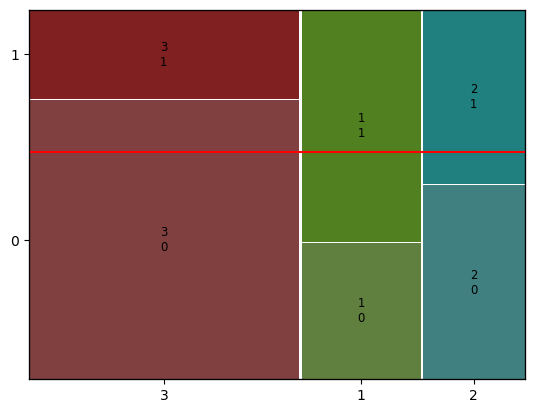

In [8]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


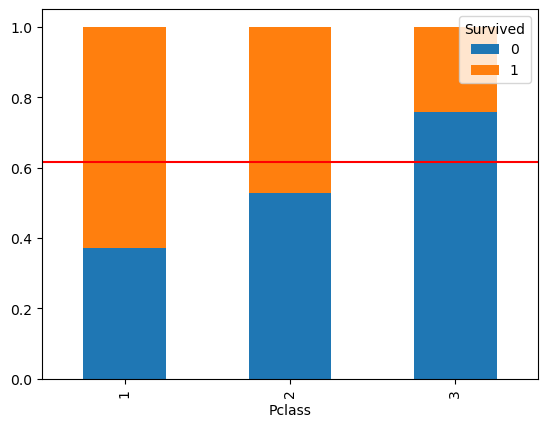

In [9]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

- 비율만 비교하므로 양에 대한 비교는 할 수 없다 !!!!!!!!!